In [191]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:\\Users\\USER", one_hot=True)

Extracting C:\Users\USER\train-images-idx3-ubyte.gz
Extracting C:\Users\USER\train-labels-idx1-ubyte.gz
Extracting C:\Users\USER\t10k-images-idx3-ubyte.gz
Extracting C:\Users\USER\t10k-labels-idx1-ubyte.gz


In [59]:
#mnist

In [60]:
#dir(mnist)

In [61]:
#dir(mnist.train)

In [64]:
mnist.train.images.shape

(55000, 784)

In [65]:
28 * 28 

784

In [67]:
mnist.train.images[0].shape

(784,)

In [69]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [70]:
sample_image = mnist.train.images[0].reshape((28,28))

Populating the interactive namespace from numpy and matplotlib


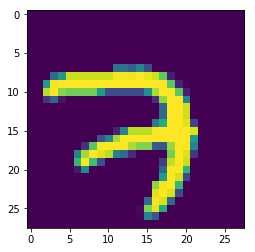

In [72]:
% pylab inline
import matplotlib.pyplot as plt
plt.imshow(sample_image)

In [73]:
 mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [74]:
sample_image2 = mnist.train.images[2].reshape((28,28))

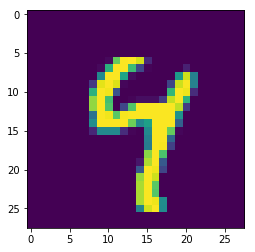

In [75]:

plt.imshow(sample_image2)

In [76]:
mnist.train.labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

## 使用Keras 辨識手寫數字

In [126]:
import keras

Using TensorFlow backend.


In [128]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense

In [148]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [149]:
x_train.shape

(60000, 28, 28)

In [150]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [151]:
x_test.shape

(10000, 28, 28)

In [152]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

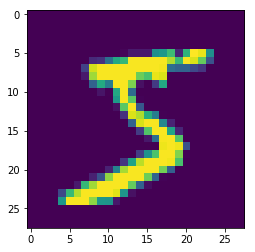

In [154]:
plt.imshow(x_train[0])

In [155]:
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [156]:
np.max(x_train[0])
np.min(x_train[0])

0

In [157]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [158]:
np.max(x_train[0])
np.min(x_train[0])

0.0

In [159]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [161]:
n_classes  = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

In [163]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 設定網路參數

In [165]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

### 建構神經網路

In [166]:
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [167]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
## Dense = activation_function(X * Weight + Bias)

### 訓練神經網路

In [168]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 34us/step - loss: 1.0719 - acc: 0.7464 - val_loss: 0.4859 - val_acc: 0.8787
Epoch 2/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.4263 - acc: 0.8860 - val_loss: 0.3538 - val_acc: 0.9043
Epoch 3/15
60000/60000 [==============================] - 2s 32us/step - loss: 0.3470 - acc: 0.9028 - val_loss: 0.3064 - val_acc: 0.9158
Epoch 4/15
60000/60000 [==============================] - ETA: 0s - loss: 0.3097 - acc: 0.911 - 2s 32us/step - loss: 0.3093 - acc: 0.9119 - val_loss: 0.2820 - val_acc: 0.9223
Epoch 5/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2841 - acc: 0.9199 - val_loss: 0.2623 - val_acc: 0.9250
Epoch 6/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2642 - acc: 0.9251 - val_loss: 0.2460 - val_acc: 0.9306
Epoch 7/15
60000/60000 [==============================] - 2s 30us/step - loss: 0.2478 - ac

In [171]:
predicted = np.argmax(model.predict(x_test), 1)

In [174]:
y = np.argmax(y_test, 1)

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y, predicted)

0.9534

In [176]:
confusion_matrix(y, predicted)

array([[ 970,    0,    1,    1,    0,    3,    3,    1,    1,    0],
       [   0, 1116,    2,    2,    0,    1,    3,    2,    9,    0],
       [   6,    3,  985,    7,    5,    2,    5,    9,    9,    1],
       [   1,    1,    8,  962,    0,   14,    1,    9,   10,    4],
       [   1,    2,    4,    0,  938,    0,    9,    2,    3,   23],
       [   9,    1,    0,   21,    4,  832,   10,    1,    8,    6],
       [  11,    3,    3,    0,    7,    9,  920,    1,    4,    0],
       [   1,    8,   20,    6,    3,    1,    0,  971,    1,   17],
       [   6,    4,    3,   18,    7,    9,   11,   10,  902,    4],
       [   9,    8,    1,   12,   24,    5,    1,    8,    3,  938]],
      dtype=int64)